In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = np.arange(0.0, 5.0, 0.1)
print(X)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


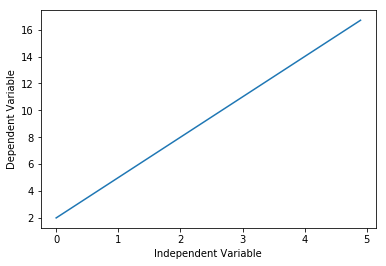

In [3]:
Y = 3*X + 2 
plt.plot(X, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [18]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*3 + 2
y_data = np.vectorize(lambda y_data: y_data + np.random.normal(loc=0.0, scale=0.1))(y_data)
print(x_data.shape, y_data.shape)

(100,) (100,)


In [20]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a*x_data + b

In [21]:
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        _, a_p, b_p = sess.run([optimizer, a, b])
        if i%10 == 0:
            print(i,[a_p, b_p])
        final = [a_p, b_p]

0 [1.0, 0.2]
10 [2.5953891, 2.2221692]
20 [2.772694, 2.121065]
30 [2.8669329, 2.0673165]
40 [2.9170241, 2.0387473]
50 [2.9436493, 2.023562]
60 [2.9578013, 2.0154903]
70 [2.9653234, 2.0112002]
80 [2.9693222, 2.0089197]
90 [2.9714477, 2.0077074]


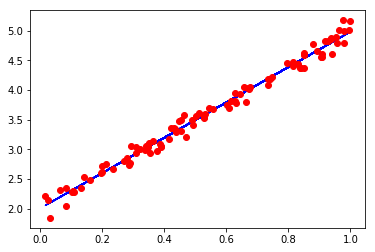

In [37]:
[a, b] = final
cr, cg, cb = (0.0, 0.0, 1.0)
f_y = np.vectorize(lambda x: a*x +b)(x_data)
line = plt.plot(x_data, f_y)
plt.setp(line, color=(cr, cg, cb))
plt.plot(x_data, y_data, 'ro')
plt.show()